### Statistical Machine Learning (CSE-342) Project

- This notebook shows the code for all the Machine Learning Techniques used by us to best perform the classification task given to us for this project.

#### 1. Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hdbscan

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import LocalOutlierFactor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA

from fcmeans import FCM
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.model_selection import GridSearchCV
from bayes_opt import BayesianOptimization

#### 2. Reading Training Data

In [3]:
# Read the data from the file train.csv
df = pd.read_csv('train.csv')
data_matrix = np.array(df.values)

# Drop the first column (id)
data_matrix = np.delete(data_matrix, 0, 1)

# Display as a table
df_train = pd.DataFrame(data_matrix)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,4096
0,0.0,0.0,1.272801,0.290501,0.581446,0.0,0.0,0.0,0.0,0.0,...,1.645888,0.86964,0.302432,0.953719,0.022545,0.498048,0.0,0.034988,0.692382,Orange_Ripe
1,0.0,0.0,1.542096,0.0,0.896557,0.049978,0.0,0.0,0.117847,0.0,...,1.50422,0.622686,0.588427,0.524415,0.305426,0.386204,0.0,0.0,0.668196,Banana_Ripe
2,0.0,0.0,1.098595,0.571866,0.500355,0.0,0.0,0.0,0.493137,0.0,...,1.169341,0.913239,0.064404,0.53127,0.0,0.471604,0.0,0.0,0.65825,Mango_Raw
3,0.0,0.101666,1.159194,0.599216,0.893206,0.0,0.200139,0.0,0.645675,0.0,...,0.560686,1.243676,0.432523,0.701881,0.0,0.589985,0.0,0.0,0.591165,Leeche_Raw
4,0.0,0.0,1.178603,0.362568,0.577602,0.0,0.0,0.0,0.079862,0.0,...,1.206032,0.736831,0.345906,0.878515,0.119,0.261441,0.0,0.0,0.458905,Mango_Ripe


#### 3. Reading the Test Data

In [4]:
# Opening the test file for the test data
df_test = pd.read_csv('test.csv')
data_matrix_test = np.array(df_test.values)

# Drop the first column (id)
data_matrix_test = np.delete(data_matrix_test, 0, 1)

# Display as a table
df_test = pd.DataFrame(data_matrix_test)
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.0,0.000000,0.908889,0.251257,0.662262,0.042495,0.000000,0.0,0.964784,0.0,...,0.694072,1.146161,1.483842,0.717836,0.472616,0.000000,0.488022,0.0,0.0,0.655670
1,0.0,0.000000,1.191055,0.407350,0.441898,0.000000,0.334858,0.0,0.295357,0.0,...,0.273436,1.466932,0.940850,0.470344,1.032085,0.000000,0.654070,0.0,0.0,0.614493
2,0.0,0.261903,0.992782,0.301102,0.636006,0.009558,0.009448,0.0,0.974949,0.0,...,0.000000,0.769983,0.834360,0.369656,1.000858,0.431571,0.361993,0.0,0.0,0.392158
3,0.0,0.000000,1.352401,0.346003,0.401412,0.000000,0.000000,0.0,0.450667,0.0,...,0.339935,1.325595,0.981124,0.486731,0.747392,0.000000,0.300671,0.0,0.0,0.628365
4,0.0,0.000000,1.114281,0.696140,0.121505,0.000000,0.000000,0.0,0.591384,0.0,...,0.093661,0.875113,0.360689,0.659230,0.546044,0.000000,0.427255,0.0,0.0,0.835671


#### 4. Outlier Detection
- We perform outlier detection on the training data using Local Outlier Factor (LoF)

In [5]:
# Create a local outlier factor object
lof = LocalOutlierFactor(n_neighbors=9, n_jobs=-1)

# Fit and predict the data
y_pred = lof.fit_predict(data_matrix[:, :-1])

# Display the number of outliers
print('Number of outliers: ', list(y_pred).count(-1))

# Create a new dataframe with the outliers removed
data_matrix = data_matrix[y_pred == 1]

print(data_matrix.shape)

Number of outliers:  6
(1211, 4097)


#### 5. Clustering
- We try the various clustering techniques as mentioned in the report

In [6]:
X_train_cluster = data_matrix[:, :-1].copy()

1. K-Means Clustering:

In [9]:
# Perform KMeans clustering

# Create an array for various k values
k_values = np.arange(2, 20)

# Create an array for the silhouette scores
silhouette_scores = np.zeros(len(k_values))

# Loop through the k values
for i, k in enumerate(k_values):
    # Create a kmeans object
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
    
    # Fit the data
    kmeans.fit(X_train_cluster)
    
    # Get the silhouette score
    silhouette_scores[i] = silhouette_score(X_train_cluster, kmeans.labels_)

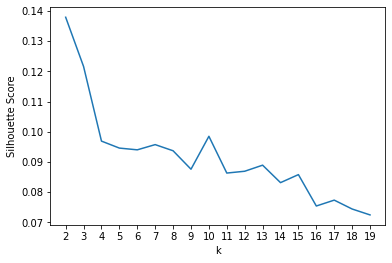

In [8]:
# Plot the silhouette scores
plt.plot(k_values, silhouette_scores)
plt.xticks(k_values)
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.show()

- The max-value we get for the score is 0.14 at $k=2$ after which it decreases progessively

2. Fuzzy c-Means Clustering:

In [13]:
# Similiarly, we can perform clustering using fuzzy c-means
X_train_cluster = data_matrix[:, :-1].copy()

# Convert the data to float
X_train_cluster = X_train_cluster.astype(np.float64)

# Create an array for various c values
c_values = np.arange(10, 20)

# Create an array for the silhouette scores
silhouette_scores = np.zeros(len(c_values))

# Loop through the c values
for i, c in enumerate(c_values):
    # Create a fuzzy c-means object
    fcm = FCM(n_clusters=c)
    
    # Fit the data
    fcm.fit(X_train_cluster)
    
    # Get the silhouette score
    silhouette_scores[i] = silhouette_score(X_train_cluster, fcm.u.argmax(axis=1))

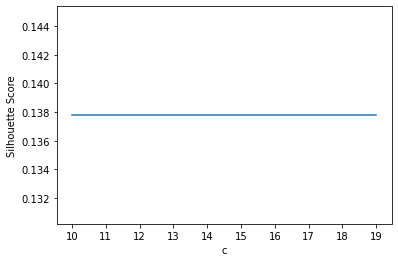

In [14]:
# Plot the silhouette scores
plt.plot(c_values, silhouette_scores)
plt.xticks(c_values)
plt.xlabel('c')
plt.ylabel('Silhouette Score')
plt.show()

- The score remains constant for fuzzy means at 0.138

3. Mean Shift Clustering:

In [17]:
# Similiarly, we can perform mean shift clustering
X_train_cluster = data_matrix[:, :-1].copy()

# Create an array for various bandwidth values
bandwidth_values = np.arange(0.1, 1.0, 0.1)

# Create an array for the silhouette scores
silhouette_scores = np.zeros(len(bandwidth_values))

# Loop through the bandwidth values
for i, bandwidth in enumerate(bandwidth_values):
    # Create a mean shift object
    mean_shift = MeanShift(bandwidth=bandwidth)
    
    # Fit the data
    mean_shift.fit(X_train_cluster)
    
    # Get the silhouette score
    silhouette_scores[i] = silhouette_score(X_train_cluster, mean_shift.labels_)


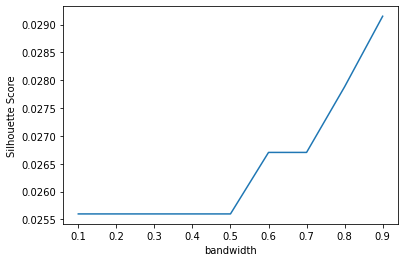

In [18]:
# Plot the silhouette scores
plt.plot(bandwidth_values, silhouette_scores)
plt.xticks(bandwidth_values)
plt.xlabel('bandwidth')
plt.ylabel('Silhouette Score')
plt.show()

- Shows hardly any increase from 0.025 to 0.029 in the various bandwidths we estimate for this

4. DBSCAN Clustering:

In [16]:
# Similiarly, we can perform clustering using DBSCAN
X_train_cluster = data_matrix[:, :-1].copy()

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5, n_jobs=-1)

# Fit the data
dbscan.fit(X_train_cluster)

# Get the labels
labels = dbscan.labels_

# Print the number of clusters
print('Number of clusters: ', len(set(labels)) - (1 if -1 in labels else 0))


Number of clusters:  0


- Everything is classified as noise by DBSCAN clustering

### 6. Dimensionality Reduction

1. Principal Component Analysis

In [21]:
X_train_dim = data_matrix[:, :-1].copy()
scaler = StandardScaler()
scaler.fit(X_train_dim)
X_train_dim = scaler.transform(X_train_dim)

# Finding the number of components that explain 90% of the variance
exp_var = []
e, v = np.linalg.eig(np.cov(X_train_dim .T))
e = np.sort(e)[::-1]
for i in range(4096):
    exp_var.append(np.sum(e[0:i])/np.sum(e))

X_var = [i+1 for i in range(4096)]

i = 0
while i < 4096:
    if exp_var[i] > 0.9:
        print(i)
        break
    i += 1

191


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


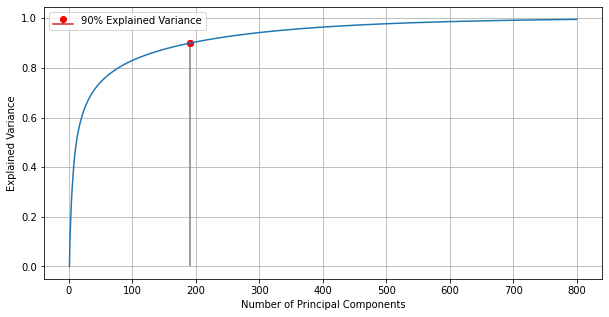

In [22]:
# Plotting the explained-variance vs number of principal components
plt.figure(figsize=(10, 5))
ax = plt.subplot()
ax.stem(i, 0.9, linefmt='grey', markerfmt='ro', label="90% Explained Variance")
plt.plot(X_var[:800], exp_var[:800])
plt.scatter(i, exp_var[i], color='red')
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance")
plt.legend()
plt.grid()
plt.show()

2. Fine-Tuning PCA with LDA
- We find the ideal range of principal components for PCA 
- We then perform Linear Discriminant Analysis (LDA) and test validation accuracy with a basic Logistic Regression

In [74]:
X_train = data_matrix[:, :-1].copy()
y_train = data_matrix[:, -1].copy()

X_test = data_matrix_test.copy()

- Splitting the data for training and testing

In [75]:
# Split the X_train and y_train into training and validation sets
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)


In [29]:
# Make a list of Principal Components
pcs = np.arange(300, 420, 5)

# Create an array for the validation scores
val_scores = np.zeros(len(pcs))

# Loop through the principal components
for i, pc in enumerate(pcs):
    # Prepare the data
    X_train = X_train2.copy()
    y_train = y_train2.copy()
    X_test = X_val.copy()
    y_test = y_val.copy()

    # Create a PCA object
    pca = PCA(n_components=pc)

    # Fit the PCA object to the training data
    pca.fit(X_train)

    # Transform the training data
    X_train = pca.transform(X_train)

    # Transform the test data
    X_test = pca.transform(X_test)

    # Apply LDA
    lda = LDA(n_components=19)

    lda.fit(X_train, y_train)

    # Transform the training data
    X_train = lda.transform(X_train)

    # Transform the test data
    X_test = lda.transform(X_test)

    # Create a logistic regression object
    log_reg = LogisticRegression(max_iter=1000)

    # Fit the data
    log_reg.fit(X_train, y_train)

    # Get the validation score
    val_scores[i] = log_reg.score(X_test, y_test)

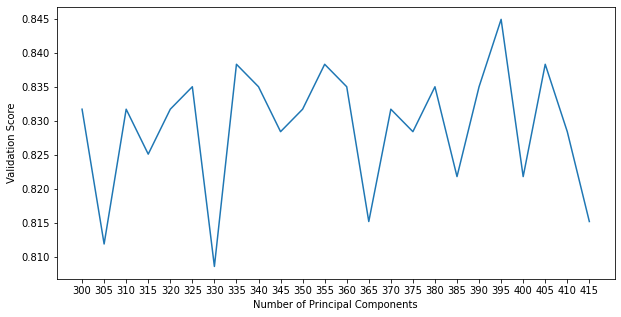

In [30]:
# Plot the validation scores in a graph of size 10x5
plt.figure(figsize=(10, 5))
plt.plot(pcs, val_scores)
plt.xticks(pcs)
plt.xlabel('Number of Principal Components')
plt.ylabel('Validation Score')
plt.show()

In [76]:
# Prepare the data
X_train = X_train2.copy()
y_train = y_train2.copy()
X_test = X_val.copy()
y_test = y_val.copy()

- After multiple iterations, we choose a random number of principal components between 340 and 360 
- This is because, this range of principal components is averaging accuracy greater than 82% on multiple iterations on the test data

In [77]:
# Create a PCA object
pca = PCA(n_components=356)

# Fit the PCA object to the training data
pca.fit(X_train)

# Transform the training data
X_train = pca.transform(X_train)

# Transform the test data
X_test = pca.transform(X_test)

In [78]:
# Apply LDA
lda = LDA(n_components=19)

# Fit the data to the LDA model
lda.fit(X_train, y_train)

# Transform the training data
X_train = lda.transform(X_train)

# Transform the test data
X_test = lda.transform(X_test)

#### 7. Machine Learning Techniques

- On the pre-processed data, we apply various machine learning models to create the best possible classifier

1. k-Nearest Neighbors Classifier

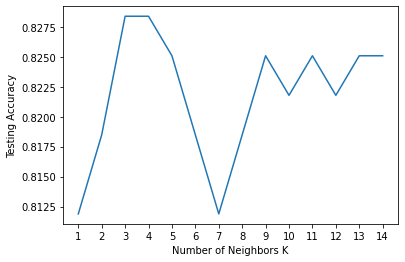

In [79]:
# Create a KNN classifier with and test from 1 to 15 neighbors
# Create a list of K for KNN
k_list = list(range(1, 15))

# Run the knn classifier for each k and store the accuracy
accuracy = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))

# Plot the accuracy for each k
import matplotlib.pyplot as plt

plt.plot(k_list, accuracy)
plt.xticks(k_list)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Testing Accuracy')
plt.show()

2. Naives Bayes Classifier

In [80]:
# Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8316831683168316


3. Logistic Regression

In [83]:
# Create a logistic regression object
logreg = LogisticRegression(multi_class='multinomial',solver='newton-cg',max_iter=1000, class_weight='balanced')

# Train the model using the training sets
logreg.fit(X_train, y_train)

# Predict the response for validation set
y_pred = logreg.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Validation Accuracy:", accuracy_score(y_val, y_pred))

Validation Accuracy: 0.834983498349835


4. Decision Tree Classifier

In [82]:
# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=20, min_samples_leaf=3, min_samples_split=6, random_state=0)

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for validation set
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Validation Accuracy:", accuracy_score(y_val, y_pred))

Validation Accuracy: 0.5874587458745875


- We see that Logistic Regression consistently gives the best classification accuracy on the train-test split
- We then use the LR Model trained in the previous steps and use it to train the Ensemble Methods

#### 8. Ensemble Techniques
1. Random Forest Classifier

In [85]:
rf = RandomForestClassifier(n_estimators=1000, bootstrap=False, max_depth=90, min_samples_leaf=3, min_samples_split=6, n_jobs=-1, random_state=0)

# Train the classifier
rf.fit(X_train, y_train)

# Predict the validation set
y_pred = rf.predict(X_test)

# Calculate the accuracy
from sklearn.metrics import accuracy_score

print("Validation Accuracy:", accuracy_score(y_val, y_pred))

Validation Accuracy: 0.8052805280528053


2. Gradient Boosting Classifier

In [93]:
#Create a Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting model
gb = GradientBoostingClassifier(n_estimators=400, learning_rate=0.01, max_depth=3, random_state=0)

# Fit the model to the training data
gb.fit(X_train, y_train)

#Predict the labels of the test data
y_pred = gb.predict(X_test)

# Calculate the accuracy of the model
accuracy = np.sum(y_pred == y_val) / len(y_val)
print('Validation Accuracy: ', accuracy)


Validation Accuracy:  0.7161716171617162


3. ADABoost Classifier

In [90]:
# Create a Adaboost Classifier
from sklearn.ensemble import AdaBoostClassifier

# Create adaboost classifer object
abc = AdaBoostClassifier(estimator=log_reg, n_estimators=400, learning_rate=0.01, random_state=0)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

# Predict the response for validation set
y_pred = model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Validation Accuracy:",accuracy_score(y_val, y_pred))

Validation Accuracy: 0.8217821782178217


4. Bagging Classifier

In [94]:
# Create a Bagging Classifier object
bag_clf = BaggingClassifier(estimator=logreg, n_estimators=100, bootstrap=True, n_jobs=-1, random_state=0)

# Train the classifier
bag_clf.fit(X_train, y_train)

# Predict the validation set
y_pred = bag_clf.predict(X_test)

# Calculate the accuracy
print("Validation Accuracy:", accuracy_score(y_val, y_pred))

Validation Accuracy: 0.834983498349835


5. Stacking Classifier

In [95]:
# Create a Stacking Classifier object
from sklearn.ensemble import StackingClassifier

# Create a list of classifiers
level0 = [('logreg', logreg), ('nb', model), ('bag_clf', bag_clf)]
level1 = logreg

# Create a stacking classifier object
stack_clf = StackingClassifier(estimators=level0, final_estimator=level1, cv=5, n_jobs=-1, passthrough=True)

# Train the classifier
stack_clf.fit(X_train, y_train)

# Predict the validation set
y_pred = stack_clf.predict(X_test)

# Calculate the accuracy
print("Validation Accuracy:", accuracy_score(y_val, y_pred))

Validation Accuracy: 0.8316831683168316


6. Voting Classifier

In [96]:
# Create a voting classifier object
from sklearn.ensemble import VotingClassifier

# Create a list of classifiers
estimators = [('logreg', logreg), ('nb', model), ('bag_clf', bag_clf), ('stack_clf', stack_clf)]

# Create a voting classifier object
ensemble = VotingClassifier(estimators, voting='hard')

# Train the classifier
ensemble.fit(X_train, y_train)

# Predict the validation set
y_pred = ensemble.predict(X_test)

# Calculate the accuracy
print("Validation Accuracy:", accuracy_score(y_val, y_pred))

Validation Accuracy: 0.8382838283828383


#### 8. Predicting on Final Test Data

In [98]:
X_train = data_matrix[:, :-1].copy()
y_train = data_matrix[:, -1].copy()

X_test = data_matrix_test.copy()

In [99]:
# We will use the same PCA and LDA models as before
# Transform the training data
X_train = pca.transform(X_train)

# Transform the test data
X_test = pca.transform(X_test)

# Fit the data to the LDA model
lda.fit(X_train, y_train)   

# Transform the training data
X_train = lda.transform(X_train)

# Transform the test data
X_test = lda.transform(X_test)

In [100]:
# We will use the Logistic Regression model as before to make predictions

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Predict the response for validation set
y_pred = logreg.predict(X_test)

In [ ]:
# Opening the file to write the predictions
file = open('submission.csv', 'w')

# Writing the header
file.write('ID,Category')
for i in range(len(y_pred)):
    file.write('\n')
    file.write(str(i))
    file.write(',')
    file.write(y_pred[i])

file.close()